In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

# Astronaut Gender Comparison from Different Countries

In [2]:
Astronauts = pd.read_csv('International Astronaut Database.csv')

In [3]:
Astronauts.head()

,Name,Country,Gender,Flights,Total Flights,Total Flight Time (ddd:hh:mm)
0,Abdul Ahad Mohmand,Afghanistan,Man,Soyuz TM-6 (1988),1,008:20:26
1,Akihiko Hoshide,Japan,Man,"STS-124 (2008), Soyuz TMA-05M (2012), SpaceX C...",3,524:08:27
2,Alan Bean,United States,Man,"Apollo 12 (1969), Skylab 3 (1973)",2,069:15:45
3,Alan G. Poindexter,United States,Man,"STS-122 (2008), STS-131 (2010)",2,027:21:09
4,Alan Shepard,United States,Man,"Mercury-Redstone 3 (1961), Apollo 14 (1971)",2,009:00:17


### What is the goal and which data needs to be removed?
#### I want to compare the ratios of male to female astronauts across different countries.  
#### I need to remove the columns for Flights, Total Flights, and Total Flight Time (ddd:hh:mm)

In [4]:
Astro1 = Astronauts.drop(['Flights'],axis=1)
                        

In [5]:
Astro1.head()

,Name,Country,Gender,Total Flights,Total Flight Time (ddd:hh:mm)
0,Abdul Ahad Mohmand,Afghanistan,Man,1,008:20:26
1,Akihiko Hoshide,Japan,Man,3,524:08:27
2,Alan Bean,United States,Man,2,069:15:45
3,Alan G. Poindexter,United States,Man,2,027:21:09
4,Alan Shepard,United States,Man,2,009:00:17


In [6]:
Astro2=Astro1.drop(['Total Flight Time (ddd:hh:mm)'], axis=1)

In [7]:
Astro2.head()

,Name,Country,Gender,Total Flights
0,Abdul Ahad Mohmand,Afghanistan,Man,1
1,Akihiko Hoshide,Japan,Man,3
2,Alan Bean,United States,Man,2
3,Alan G. Poindexter,United States,Man,2
4,Alan Shepard,United States,Man,2


In [8]:
Astro3=Astro2.drop(['Total Flights'], axis=1)

In [9]:
Astro3.head()

,Name,Country,Gender
0,Abdul Ahad Mohmand,Afghanistan,Man
1,Akihiko Hoshide,Japan,Man
2,Alan Bean,United States,Man
3,Alan G. Poindexter,United States,Man
4,Alan Shepard,United States,Man


### Group the Data by Countries

In [10]:
Astro3.groupby('Country')['Gender'].sum()   


Country
Afghanistan                                                           Man
Austria                                                               Man
Belgium                                                            ManMan
Brazil                                                                Man
Bulgaria                                                           ManMan
Canada                                 ManManManManManWomanManManWomanMan
China                                 ManManManManManWomanManManManManMan
Cuba                                                                  Man
Czechoslovakia                                                        Man
Denmark                                                               Man
East Germany                                                          Man
France                                   WomanManManManManManManManManMan
Germany                                    ManManManManManManManManManMan
Hungary                       

<AxesSubplot:>

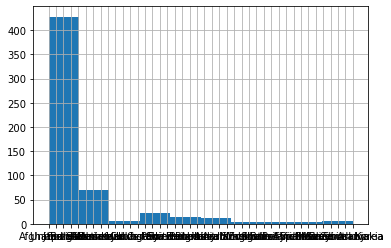

In [11]:
Astro3.Country.hist()

<AxesSubplot:>

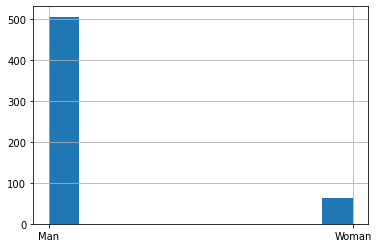

In [12]:
Astro3.Gender.hist()

In [13]:
Astro3

,Name,Country,Gender
0,Abdul Ahad Mohmand,Afghanistan,Man
1,Akihiko Hoshide,Japan,Man
2,Alan Bean,United States,Man
3,Alan G. Poindexter,United States,Man
4,Alan Shepard,United States,Man
...,...,...,...
565,Yuri Romanenko,Soviet Union,Man
566,Yuri Shargin,Russia,Man
567,Yury Usachov,Russia,Man
568,Zhai Zhigang,China,Man


#### Created tableau worksheets to show the comparisions between the countries

## What did I find......
#### I found that there are only 9 countries that have produced male and female astronauts.  Canada, China, France, Italy, Japan, Russia, Soviet Union, United Kingdom, and the United States
#### There are 32 countries who have only produced male astronauts
#### There are 2 countries who have only produced femal astronauts and those are Iran and South Korea

# 

In [14]:
Astro = pd.read_csv('astronauts.csv')

In [15]:
Astro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

In [16]:
Astro.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [17]:
Astro['Majored']=Astro['Undergraduate Major']+ "/" + Astro["Graduate Major"].map(str) 

In [18]:
Astro.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Majored
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,Geology/Geology
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,Engineering Physics/Solar Physics
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,Engineering/Aerospace Engineering
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,Applied Mathematics/Applied Mathematics
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,Mechanical Engineering/Astronautics


In [19]:
Astro1 = Astro.drop(['Death Date', 'Death Mission'], axis=1)

In [20]:
Astro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

In [21]:
Astro1=Astro1.drop(['Missions'], axis=1)

In [22]:
Astro1

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Majored
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,Geology/Geology
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,Engineering Physics/Solar Physics
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,Engineering/Aerospace Engineering
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,Applied Mathematics/Applied Mathematics
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,Mechanical Engineering/Astronautics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,Electrical Engineering/Medicine
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,Physics/Physics; Business Management
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Military Science/Aeronautical & Astronautical ...
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,Aeronautical Engineering/nan


In [23]:
Astro1=Astro1.drop(['Birth Date', 'Group'], axis=1)

In [24]:
Astro1

,Name,Year,Status,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Majored
0,Joseph M. Acaba,2004.0,Active,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,Geology/Geology
1,Loren W. Acton,NaN,Retired,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,Engineering Physics/Solar Physics
2,James C. Adamson,1984.0,Retired,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,Engineering/Aerospace Engineering
3,Thomas D. Akers,1987.0,Retired,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,Applied Mathematics/Applied Mathematics
4,Buzz Aldrin,1963.0,Retired,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,Mechanical Engineering/Astronautics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,Retired,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,Electrical Engineering/Medicine
353,Neil W. Woodward III,1998.0,Retired,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,Physics/Physics; Business Management
354,Alfred M. Worden,1966.0,Retired,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Military Science/Aeronautical & Astronautical ...
355,John W. Young,1962.0,Retired,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,Aeronautical Engineering/nan


In [25]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

### Data Sets

In [26]:
Data = pd.read_csv('NasaData.csv')

In [27]:
Budget =pd.read_excel('budget and accepted.xlsx')

In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714195 entries, 0 to 714194
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   NASA             714195 non-null  object
 1   Military         714195 non-null  object
 2   Gender           714195 non-null  object
 3   Name             714195 non-null  object
 4   Missions         669486 non-null  object
 5   Space Flights R  714195 non-null  int64 
 6   GenderR          714195 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 38.1+ MB


In [29]:
Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               69 non-null     int64  
 1   White House Budget Submission      65 non-null     float64
 2   Males Accepted in NASA Program     27 non-null     float64
 3   Females Accepted in NASA Program   27 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


In [30]:
Gender = pd.read_excel('Female and Male Astronauts Accepted in the NASA Program.xlsx')

In [31]:
Gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 0 non-null      float64
 1   Cohort                             27 non-null     int64  
 2   Year                               27 non-null     int64  
 3   Males Accepted in NASA Program     27 non-null     int64  
 4   Females Accepted in NASA Program   27 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


In [32]:
BudgetGender = pd.merge(Gender, Budget, on='Year')

In [33]:
BudgetGender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   0 non-null      float64
 1   Cohort                               27 non-null     int64  
 2   Year                                 27 non-null     int64  
 3   Males Accepted in NASA Program _x    27 non-null     int64  
 4   Females Accepted in NASA Program _x  27 non-null     int64  
 5   White House Budget Submission        27 non-null     float64
 6   Males Accepted in NASA Program _y    27 non-null     float64
 7   Females Accepted in NASA Program _y  27 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 1.9 KB


In [34]:
BudgetGender.head()

,ID,Cohort,Year,Males Accepted in NASA Program _x,Females Accepted in NASA Program _x,White House Budget Submission,Males Accepted in NASA Program _y,Females Accepted in NASA Program _y
0,NaN,1,1959,100,0,426.6,100.0,0.0
1,NaN,2,1962,100,0,1940.3,100.0,0.0
2,NaN,3,1963,100,0,3787.3,100.0,0.0
3,NaN,4,1965,100,0,5445.0,100.0,0.0
4,NaN,5,1966,100,0,5260.0,100.0,0.0


In [35]:
BudgetGender

,ID,Cohort,Year,Males Accepted in NASA Program _x,Females Accepted in NASA Program _x,White House Budget Submission,Males Accepted in NASA Program _y,Females Accepted in NASA Program _y
0,NaN,1,1959,100,0,426.600,100.0,0.0
1,NaN,2,1962,100,0,1940.300,100.0,0.0
2,NaN,3,1963,100,0,3787.300,100.0,0.0
3,NaN,4,1965,100,0,5445.000,100.0,0.0
4,NaN,5,1966,100,0,5260.000,100.0,0.0
5,NaN,6,1967,100,0,5012.000,100.0,0.0
6,NaN,7,1969,100,0,4370.400,100.0,0.0
7,NaN,8,1978,83,17,4080.989,83.0,17.0
8,NaN,9,1980,89,11,5291.286,89.0,11.0
9,NaN,10,1984,83,17,7106.500,83.0,17.0


In [36]:
BudgetGender.dropna()

,ID,Cohort,Year,Males Accepted in NASA Program _x,Females Accepted in NASA Program _x,White House Budget Submission,Males Accepted in NASA Program _y,Females Accepted in NASA Program _y


In [37]:
BudgetGender

,ID,Cohort,Year,Males Accepted in NASA Program _x,Females Accepted in NASA Program _x,White House Budget Submission,Males Accepted in NASA Program _y,Females Accepted in NASA Program _y
0,NaN,1,1959,100,0,426.600,100.0,0.0
1,NaN,2,1962,100,0,1940.300,100.0,0.0
2,NaN,3,1963,100,0,3787.300,100.0,0.0
3,NaN,4,1965,100,0,5445.000,100.0,0.0
4,NaN,5,1966,100,0,5260.000,100.0,0.0
5,NaN,6,1967,100,0,5012.000,100.0,0.0
6,NaN,7,1969,100,0,4370.400,100.0,0.0
7,NaN,8,1978,83,17,4080.989,83.0,17.0
8,NaN,9,1980,89,11,5291.286,89.0,11.0
9,NaN,10,1984,83,17,7106.500,83.0,17.0


# Did the yearly budget effect the amount of females hired by NASA?

In [38]:
from scipy import stats

<AxesSubplot:>

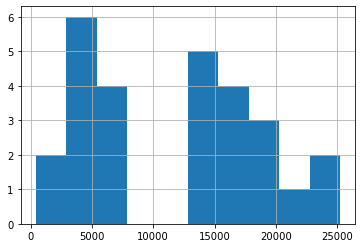

In [39]:
BudgetGender['White House Budget Submission'].hist()

In [40]:
stats.ttest_rel(BudgetGender['White House Budget Submission'],BudgetGender['Females Accepted in NASA Program _x'])

Ttest_relResult(statistic=8.525912610423111, pvalue=5.251925343595041e-09)

## The budget has a significant impact on the hiring of female astronauts

## How does it compare to the hiring of males?


In [41]:
stats.ttest_rel(BudgetGender['White House Budget Submission'],BudgetGender['Males Accepted in NASA Program _x'])

Ttest_relResult(statistic=8.445979459246187, pvalue=6.301593693530343e-09)

## The budget also has a significant impact on the hiring of male astronauts
### The yearly budget has no effect on weather or not more females are hired by NASA over males

In [43]:
Astro

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Majored
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,Geology/Geology
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,Engineering Physics/Solar Physics
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,Engineering/Aerospace Engineering
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,Applied Mathematics/Applied Mathematics
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,Mechanical Engineering/Astronautics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN,Electrical Engineering/Medicine
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN,Physics/Physics; Business Management
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN,Military Science/Aeronautical & Astronautical ...
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN,Aeronautical Engineering/nan


In [46]:
Astro4 = Astro.drop(['Status','Birth Date', 'Group', 'Birth Place', 'Death Date', 'Death Mission', 'Missions'], axis=1)

In [47]:
Astro4

,Name,Year,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Majored
0,Joseph M. Acaba,2004.0,Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,Geology/Geology
1,Loren W. Acton,NaN,Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,Engineering Physics/Solar Physics
2,James C. Adamson,1984.0,Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,Engineering/Aerospace Engineering
3,Thomas D. Akers,1987.0,Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,Applied Mathematics/Applied Mathematics
4,Buzz Aldrin,1963.0,Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,Mechanical Engineering/Astronautics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,Electrical Engineering/Medicine
353,Neil W. Woodward III,1998.0,Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,Physics/Physics; Business Management
354,Alfred M. Worden,1966.0,Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Military Science/Aeronautical & Astronautical ...
355,John W. Young,1962.0,Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,Aeronautical Engineering/nan


In [65]:
Astro4.groupby('Year')['Gender'].value_counts()

Year    Gender
1959.0  Male       7
1962.0  Male       8
1963.0  Male      14
1965.0  Male       6
1966.0  Male      19
1967.0  Male      11
1969.0  Male       7
1978.0  Male      29
        Female     6
1980.0  Male      17
        Female     2
1984.0  Male      15
        Female     3
1985.0  Male      11
        Female     2
1987.0  Male      13
        Female     2
1990.0  Male      18
        Female     5
1992.0  Male      16
        Female     3
1995.0  Male      14
        Female     5
1996.0  Male      27
        Female     8
1998.0  Male      21
        Female     4
2000.0  Male      14
        Female     3
2004.0  Male       9
        Female     2
2009.0  Male       6
        Female     3
Name: Gender, dtype: int64

## The First females were not hired until 1978

## Each year, the intake of females into the program are less then those of males accepted into the program

In [68]:
Astro4.groupby('Gender')['Space Flights'].value_counts()

Gender  Space Flights
Female  1                12
        2                12
        3                10
        4                 6
        5                 6
        0                 4
Male    2                86
        1                77
        3                54
        4                51
        0                19
        5                13
        6                 5
        7                 2
Name: Space Flights, dtype: int64